In [1]:
# Import the `pandas` library as `pd`
import pandas as pd

# Load in the data with `read_csv()`
salesData = pd.read_csv("salesData.csv", index_col = 0)

#Take a glance at top 10 rows
salesData.head(10)

,nItems,mostFreqStore,mostFreqCat,nCats,preferredBrand,nBrands,nPurch,salesLast3Mon,salesThisMon,daysSinceLastPurch,meanItemPrice,meanShoppingCartValue,customerDuration
id,,,,,,,,,,,,,
1,1469,Stockton,Alcohol,72,Veina,517,82,2741.97,1283.87,1,1.866555,33.438659,821
2,1463,Stockton,Alcohol,73,Veina,482,88,2790.58,1242.60,1,1.907437,31.711136,657
3,262,Colorado Springs,Shoes,55,Bo,126,56,1529.55,682.57,1,5.837977,27.313393,548
4,293,Colorado Springs,Bakery,50,Veina,108,43,1765.81,730.23,1,6.026655,41.065349,596
5,108,Colorado Springs,Beverages,32,Bo,79,18,1180.00,552.54,12,10.925926,65.555556,603
6,216,Boston,Alcohol,41,Bo,98,35,1345.29,662.52,2,6.228194,38.436857,673
7,174,Columbus,Packaged food,36,Bo,78,34,1338.81,621.46,2,7.694310,39.376765,612
8,122,Seattle,Shoes,31,Bo,62,12,1256.96,367.07,4,10.302951,104.746667,517
9,204,Jersey,Bakery,41,Bo,99,26,1963.60,780.78,14,9.625490,75.523077,709


In [2]:
# obtain a description of the data, function will automatically choose numerical values
salesData.describe()

,nItems,nCats,nBrands,nPurch,salesLast3Mon,salesThisMon,daysSinceLastPurch,meanItemPrice,meanShoppingCartValue,customerDuration
count,5122.000000,5122.000000,5122.000000,5122.000000,5122.000000,5122.000000,5122.000000,5122.000000,5122.000000,5122.000000
mean,186.269426,36.358649,81.915072,19.877587,1322.604492,605.846193,6.277235,12.253981,91.810634,644.078485
std,136.885007,13.357449,48.013472,12.545377,370.696876,184.196839,8.926092,16.403479,61.891531,151.560904
min,1.000000,1.000000,1.000000,1.000000,188.990000,0.000000,1.000000,1.866555,17.351562,0.000000
25%,83.000000,27.000000,45.000000,11.000000,1067.300000,480.982500,2.000000,6.016695,54.429474,547.000000
50%,157.000000,37.000000,75.500000,17.000000,1332.135000,607.810000,3.000000,8.529072,76.565747,649.000000
75%,258.000000,47.000000,111.000000,26.000000,1573.530000,731.535000,7.000000,13.185741,110.610227,745.000000
max,1469.000000,73.000000,517.000000,88.000000,2790.580000,1362.780000,89.000000,377.900000,914.040000,1355.000000


In [3]:
# generate the correlation matrix, function will automatically choose numerical values
corr = salesData.corr()

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

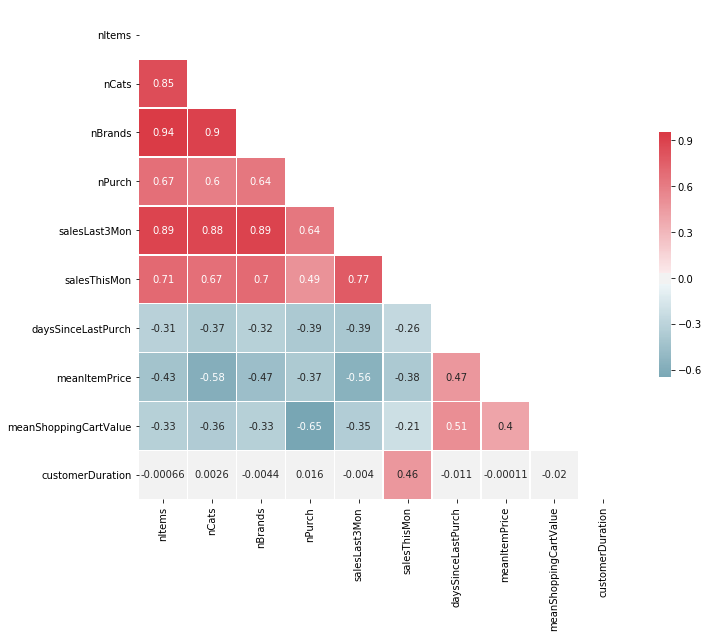

In [5]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax= 0.95, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
X = salesData[['salesLast3Mon']]
Y = salesData[['salesThisMon']]
lm1 = LinearRegression()
lm1.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

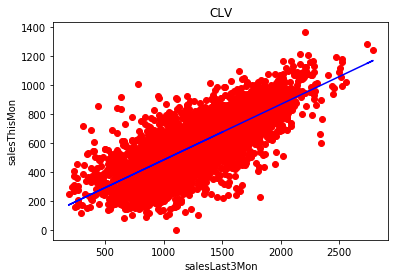

In [8]:
plt.title('CLV')
plt.xlabel('salesLast3Mon')
plt.ylabel('salesThisMon')
plt.scatter(X, Y, color = 'red')
plt.plot(X, lm1.predict(X), color = 'blue')
plt.show()

In [9]:
corr = salesData.loc[:, salesData.columns != 'salesThisMon'].corr()
VIF = np.linalg.inv(corr)
VIF2 = list(zip(list(corr), VIF.diagonal()))
VIF3 = pd.DataFrame(VIF2, columns = ['Features', 'VIF Factor'])
VIF3

,Features,VIF Factor
0,nItems,11.207587
1,nCats,7.389828
2,nBrands,13.630348
3,nPurch,2.949446
4,salesLast3Mon,7.663625
5,daysSinceLastPurch,1.576136
6,meanItemPrice,1.894341
7,meanShoppingCartValue,2.223530
8,customerDuration,1.001143


In [10]:
X = salesData[salesData.columns[~salesData.columns.isin(['nItems','nBrands','salesThisMon'])]]._get_numeric_data()
Y = salesData[['salesThisMon']]
lm2 = LinearRegression()
lm2.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
corr = salesData[salesData.columns[~salesData.columns.isin(['nItems','nBrands','salesThisMon'])]]._get_numeric_data().corr()
VIF = np.linalg.inv(corr)
VIF2 = list(zip(list(corr), VIF.diagonal()))
VIF3 = pd.DataFrame(VIF2, columns = ['Features', 'VIF Factor'])
VIF3

,Features,VIF Factor
0,nCats,4.913851
1,nPurch,2.676660
2,salesLast3Mon,5.347662
3,daysSinceLastPurch,1.569511
4,meanItemPrice,1.792340
5,meanShoppingCartValue,2.201615
6,customerDuration,1.000859


In [12]:
import statsmodels.api as sm
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           salesThisMon   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 3.423e+04
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        19:16:48   Log-Likelihood:                -30403.
No. Observations:                5122   AIC:                         6.082e+04
Df Residuals:                    5115   BIC:                         6.087e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
nCats                    -0.2755      0.212     -1.297      0.195      -0.692       0.141
nPurch                    0.4256      0.167      2.556      0.011       0.099       0.752
salesLast3Mon             0.2925      0.007     39.669      0.000       0.278       0.307
daysSinceLastPurch       -0.2904      0.179     -1.621      0.105      -0.642       0.061
meanItemPrice            -0.8518      0.099     -8.589      0.000      -1.046      -0.657
meanShoppingCartValue    -0.0110      0.030     -0.371      0.710      -0.069       0.047
customerDuration          0.3737      0.007     56.510      0.000       0.361       0.387
==============================================================================
Omnibus:                       41.655   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.087
Skew:                           0.038   Prob(JB):                     1.21e-14
Kurtosis:                       3.543   Cond. No.                         255.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
salesDataMon2To4 = pd.read_csv("salesDataMon2To4.csv", index_col = 0)

#Take a glance at top 10 rows
salesDataMon2To4.head(10)

,nItems,mostFreqStore,mostFreqCat,nCats,preferredBrand,nBrands,nPurch,salesLast3Mon,daysSinceLastPurch,meanItemPrice,meanShoppingCartValue,customerDuration
id,,,,,,,,,,,,
1,1401,Stockton,Alcohol,73,Veina,483,85,2712.99,3,1.936467,31.917529,852
2,1461,Stockton,Alcohol,74,Veina,484,86,2744.57,2,1.878556,31.913605,688
3,262,Colorado Springs,Shoes,55,Bo,131,55,1527.10,1,5.828626,27.765455,579
4,250,Colorado Springs,Bakery,43,Veina,93,44,1675.11,2,6.700440,38.070682,627
5,149,Colorado Springs,Packaged food,36,Bo,90,27,1265.18,4,8.491141,46.858519,634
6,208,Boston,Shoes,35,Bo,82,33,1353.23,1,6.505913,41.006970,704
7,166,Columbus,Packaged food,39,Nilima,76,34,1336.73,7,8.052590,39.315588,643
9,188,Jersey,Bakery,43,Bo,92,26,1803.83,1,9.594840,69.378077,740
10,295,Seattle,Alcohol,55,Bo,100,30,1565.14,2,5.305559,52.171333,511


In [14]:
Xnew = salesDataMon2To4[salesDataMon2To4.columns[~salesDataMon2To4.columns.isin(['nItems','nBrands'])]]._get_numeric_data()
ynew = model.predict(Xnew)
Prediction_Results = pd.concat([Xnew, ynew], axis=1)
Prediction_Results.head(20)

,nCats,nPurch,salesLast3Mon,daysSinceLastPurch,meanItemPrice,meanShoppingCartValue,customerDuration,0
id,,,,,,,,
1,73,85,2712.99,3,1.936467,31.917529,852,1125.118119
2,74,86,2744.57,2,1.878556,31.913605,688,1073.566305
3,55,55,1527.10,1,5.828626,27.765455,579,665.730768
4,43,44,1675.11,2,6.700440,38.070682,627,724.436647
5,36,27,1265.18,4,8.491141,46.858519,634,599.634254
6,35,33,1353.23,1,6.505913,41.006970,704,657.001290
7,39,34,1336.73,7,8.052590,39.315588,643,625.664566
9,43,26,1803.83,1,9.594840,69.378077,740,794.128992
10,55,30,1565.14,2,5.305559,52.171333,511,640.694047
